# Project Progress Report Title: 

** Every team member **NEEDS** to submit the files on CANVAS.**
## Team

- Name (NetID): Expanded roles and current contributions.
* Nathaly Ingol (qhd10):
* Aleena Tomy (zdh39):
* JD (John) Escobedo (dxh19):


## Project Abstract
- [ ] Refined abstract, incorporating instructor comments.

## Problem Statement
- [ ] Expanded explanation, addressing all feedback and what has been learned about dataset and the task since project proposal. 

## Dataset
- [ ] Data description and visualization (figures/tables as relevant).
- [ ] Observations of distributions, correlations, outlier detection, and data cleaning.
- [ ] Insights gained from EDA that inform next steps.


## Methodology

### Baseline method implementation
- [ ] Description of baseline model(s) attempted.
- [ ] Results: quantitative metrics and  qualitative observations.
- [ ] Discussion of results: What do baseline results reveal about the problem/data?
- [ ] Visual or tabular summaries as appropriate.

### Improvements and other methods implementation
- [ ] Feature engineering, feature selection, high dimensionality mitigation. 
- [ ] Potentially better fit model proposed here. Explain why is it a better fit. 
- [ ] Show implementation, hypertuning.  
- [ ] Propose what you will do in the remaining week. 

## Teaming Strategy
- [ ] Individual team member contributions.

| Name | Contribution | Section(s) Authored / Tasks Completed |
|------------|------------|------------|
| [ ] Aleena Tomy | What where how |
| [ ] JD Escobedo | What where how |
| [ ] Nathaly Ingol | What where how |

(Add additional rows as needed for each member.)

## Mitigation Plan
- [ ] Key milestones or tasks to be completed by project end.
    - asdf
- [ ] Who is responsible for each task?
    - asdf
- [ ] Timeline/checkpoints to ensure on-time submission.
    - We have a Code Freeze on December 3rd for the final report/presentation and PDF generation.
- [ ] What if you fail? 
    - We are not going to fail. 🏋🏼‍♀️

# Water Quality Analysis:

**Water Quality Analysis**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

sns.set_style('whitegrid')

df = pd.read_csv('data\water-quality-46085.csv')
print(f"Raw dataset loaded: {df.shape}")
print("\n")
df.head()

Raw dataset loaded: (1259444, 25)




,Sample ID,Grab ID,Profile ID,Sample Number,Collect DateTime,Depth (m),Site Type,Area,Locator,Site,...,MDL,RDL,Text Value,Sample Info,Steward Note,Replicates,Replicate Of,Method,Date Analyzed,Data Source
0,16316,16316.0,10702,9209019,04/13/1992 12:00:00 AM,1.0,Streams and Rivers,Pipers,KSHZ06,Pipers Creek mouth,...,NaN,NaN,.070||King County Nstream Database/B53311,NaN,NaN,NaN,NaN,none,NaN,KCEL
1,8937,8937.0,37688,7915489,06/20/1979 12:00:00 AM,1.0,Streams and Rivers,Crisp,0321,Crisp Creek mouth at SE Green Valley Rd,...,NaN,NaN,.727||King County Nstream Database/RS2,NaN,NaN,NaN,NaN,NaN,NaN,KCEL
2,137745,137745.0,54368,L58228-1,06/25/2013 08:09:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0512,Ship Canal above locks,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,06/25/2013,KCEL
3,131816,131816.0,50605,L55068-6,02/13/2012 09:38:00 AM,1.0,Large Lakes,Lake Union/Ship Canal,0540,Ship Canal near Montlake Bridge,...,0.002,0.005,NaN,NaN,NaN,NaN,NaN,SM4500-P-F,02/15/2012,KCEL
4,82325,82325.0,43896,L52933-87,03/30/2011 02:36:00 PM,4.2,Large Lakes,Lake Washington,0804,Lake Washington north end,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HYDROLAB,NaN,KCEL


In [3]:
print(df.columns)
print("\n")
print(f"There's a total of {len(df.columns)} features")

Index(['Sample ID', 'Grab ID', 'Profile ID', 'Sample Number',
       'Collect DateTime', 'Depth (m)', 'Site Type', 'Area', 'Locator', 'Site',
       'Parameter', 'Value', 'Units', 'QualityId', 'Lab Qualifier', 'MDL',
       'RDL', 'Text Value', 'Sample Info', 'Steward Note', 'Replicates',
       'Replicate Of', 'Method', 'Date Analyzed', 'Data Source'],
      dtype='object')


There's a total of 25 features


In [4]:
print("\n A. Data Type, Missing Values, Mean, Min, Max")
print("\n Feature summary for 25 features")

feature_summary = []

for col in df.columns:
    col_data = df[col]

    entry = {
        "Feature": col,
        "Data Type": col_data.dtype,
        "Distinct Values": col_data.nunique(),
        "Missing Count": col_data.isna().sum(),
        "Missing %": round((col_data.isna().sum() / len(df)) * 100, 2)
    }

    if pd.api.types.is_numeric_dtype(col_data):
        entry["Mean"] = col_data.mean()
        entry["Min"] = col_data.min()
        entry["Max"] = col_data.max()
    else:
        entry["Mean"] = "N/A"
        entry["Min"] = "N/A"
        entry["Max"] = "N/A"

    feature_summary.append(entry)

feature_summary_df = pd.DataFrame(feature_summary)

print(feature_summary_df.to_string(index=False))


 A. Data Type, Missing Values, Mean, Min, Max

 Feature summary for 25 features
         Feature Data Type  Distinct Values  Missing Count  Missing %           Mean     Min        Max
       Sample ID     int64           154694              0       0.00   80720.586478     531     186033
         Grab ID   float64           112985         376778      29.92    88473.75364   700.0   186033.0
      Profile ID     int64            54951              0       0.00   42654.373308       4      79119
   Sample Number    object           154694              0       0.00            N/A     N/A        N/A
Collect DateTime    object           102284              0       0.00            N/A     N/A        N/A
       Depth (m)   float64              646         376778      29.92      10.602864     0.0      201.0
       Site Type    object                6              0       0.00            N/A     N/A        N/A
            Area    object               67            133       0.01            N/A   


 Correlation matrix for original numeric features 

              Sample ID   Grab ID  Profile ID  Depth (m)     Value  QualityId  \
Sample ID      1.000000  0.999988    0.882730   0.103434  0.004746  -0.271921   
Grab ID        0.999988  1.000000    0.892492   0.103506  0.001251  -0.273890   
Profile ID     0.882730  0.892492    1.000000   0.160311  0.005797  -0.270830   
Depth (m)      0.103434  0.103506    0.160311   1.000000 -0.000783  -0.136409   
Value          0.004746  0.001251    0.005797  -0.000783  1.000000   0.029563   
QualityId     -0.271921 -0.273890   -0.270830  -0.136409  0.029563   1.000000   
MDL            0.039944 -0.011045    0.049498   0.004485  0.008106  -0.036413   
RDL           -0.005126 -0.032430    0.008025   0.014335  0.004734   0.004748   
Replicates     0.999985  0.999998    0.947276   0.095641  0.013534  -0.620484   
Replicate Of   0.999997  0.999999    0.938785   0.120710 -0.192880  -0.716577   

                   MDL       RDL  Replicates  Replicate

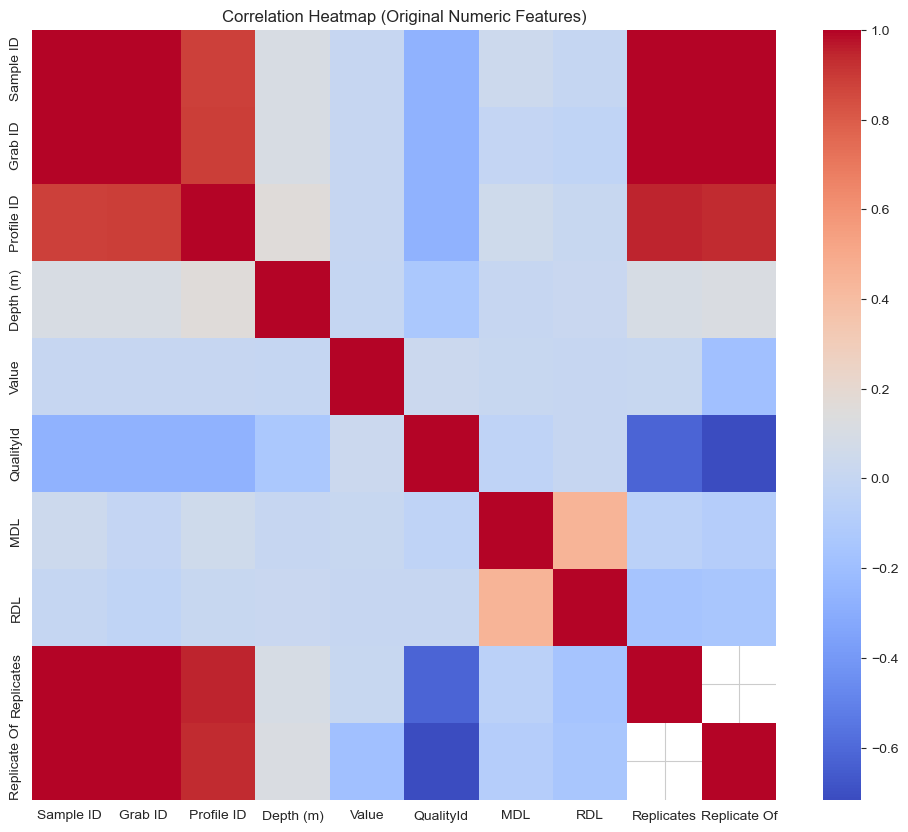


Top 10 strongest correlations (original features):
Grab ID       Replicate Of    0.999999
Replicate Of  Grab ID         0.999999
Replicates    Grab ID         0.999998
Grab ID       Replicates      0.999998
Sample ID     Replicate Of    0.999997
Replicate Of  Sample ID       0.999997
Grab ID       Sample ID       0.999988
Sample ID     Grab ID         0.999988
Replicates    Sample ID       0.999985
Sample ID     Replicates      0.999985
dtype: float64


In [5]:
print("\n Correlation matrix for original numeric features \n")

numeric_cols = df.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr()

# Display correlation matrix
print(corr_matrix)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Original Numeric Features)")
plt.show()

# Top correlations
sorted_corr = corr_matrix.unstack().sort_values(ascending=False)
top_corr = sorted_corr[(sorted_corr < 1.0)].head(10)

print("\nTop 10 strongest correlations (original features):")
print(top_corr)


 Histograms for all features 



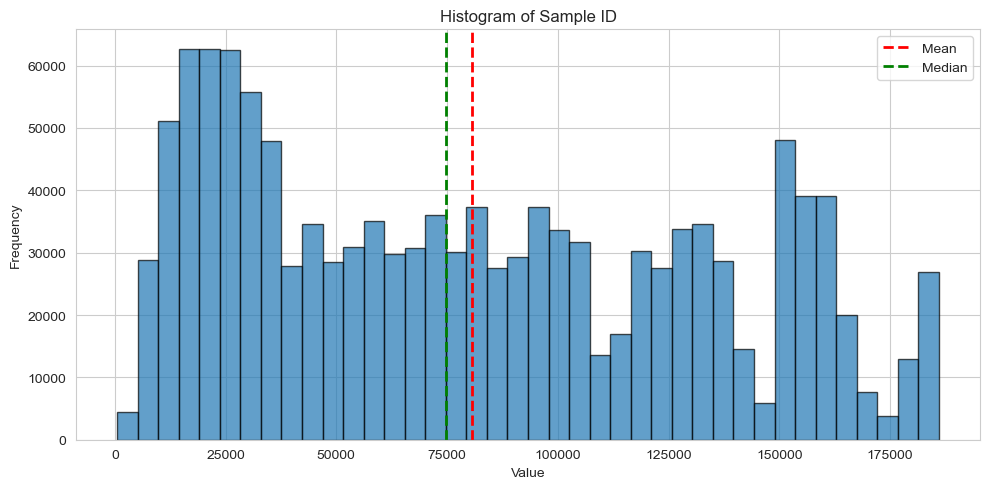

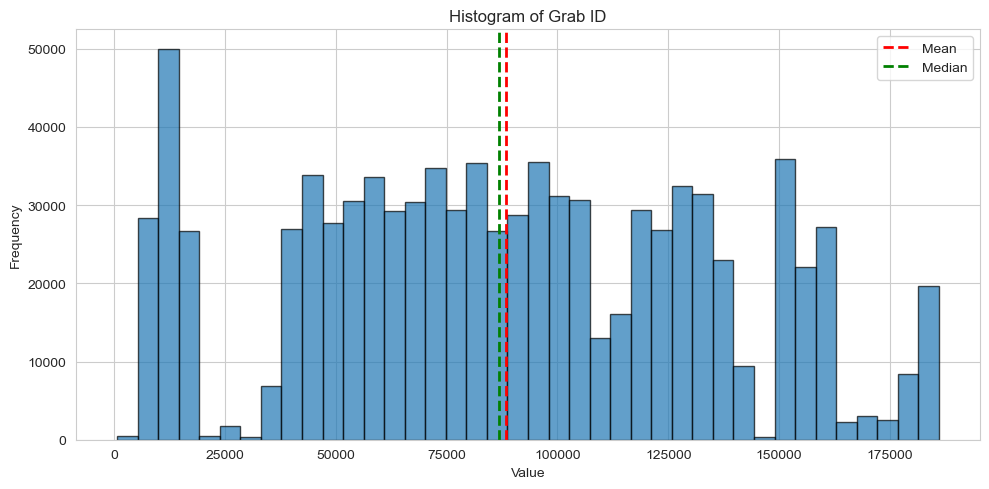

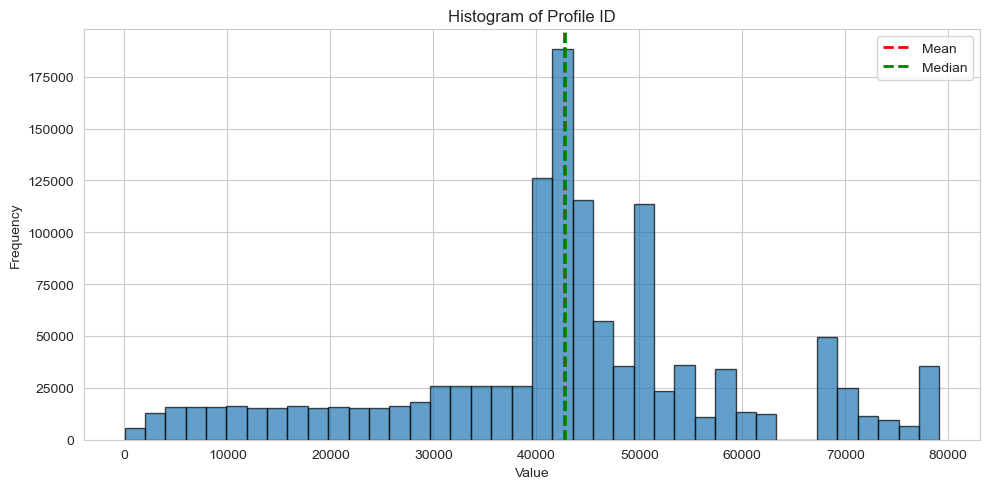

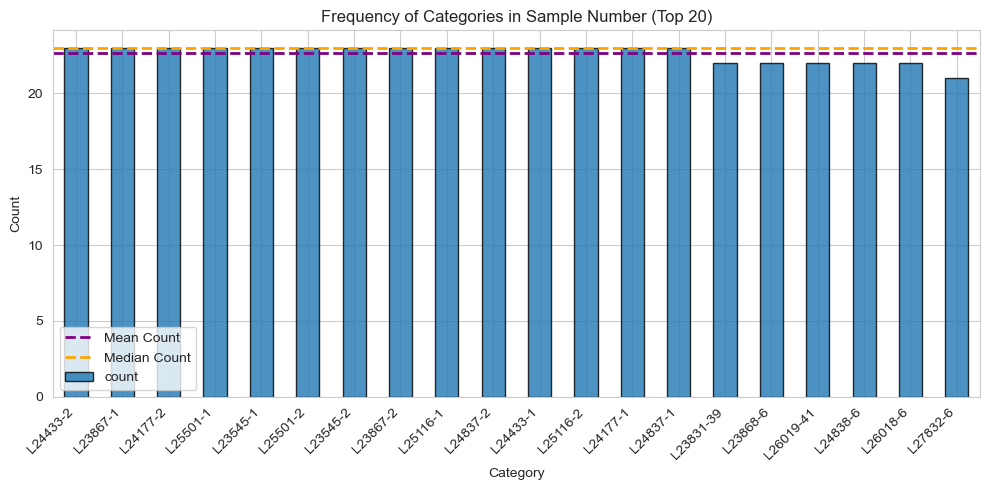

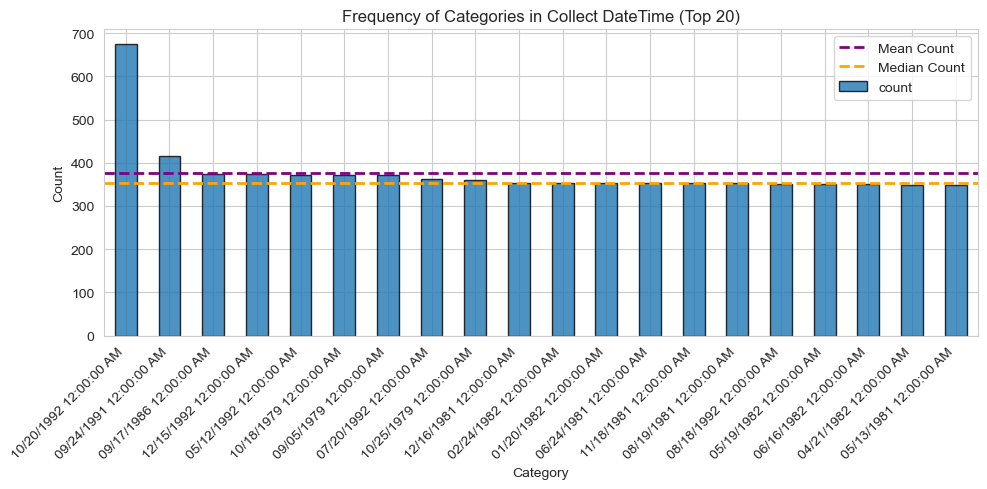

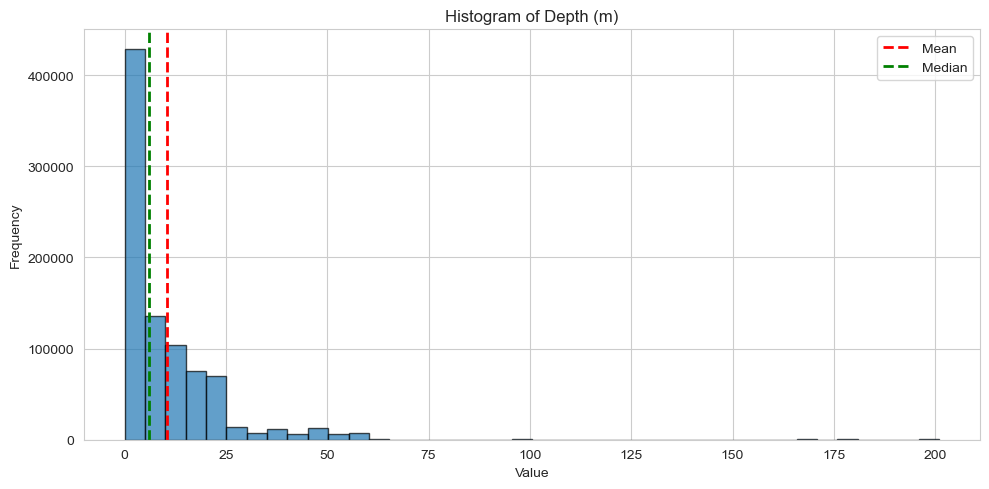

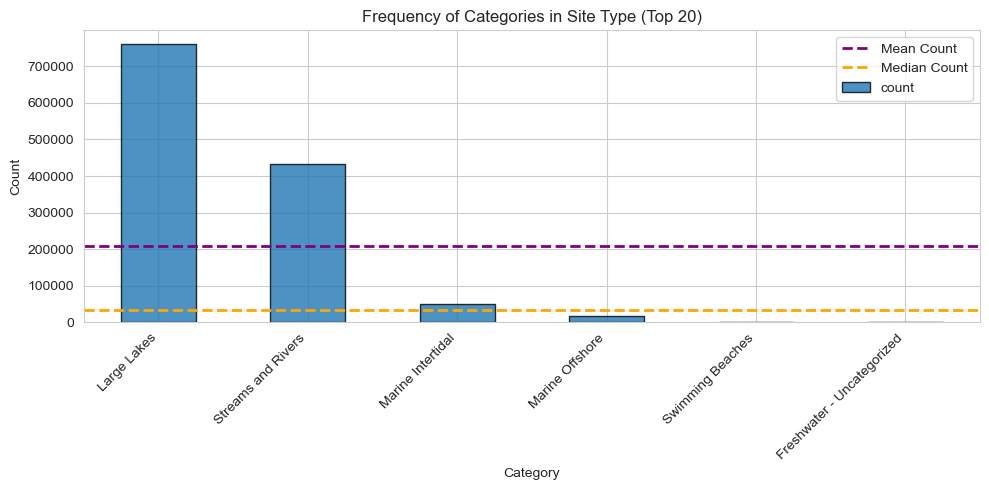

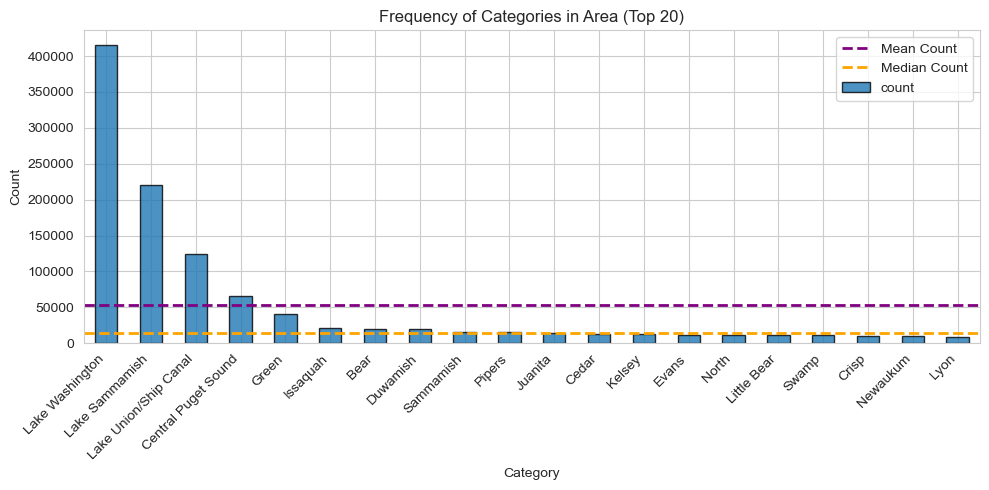

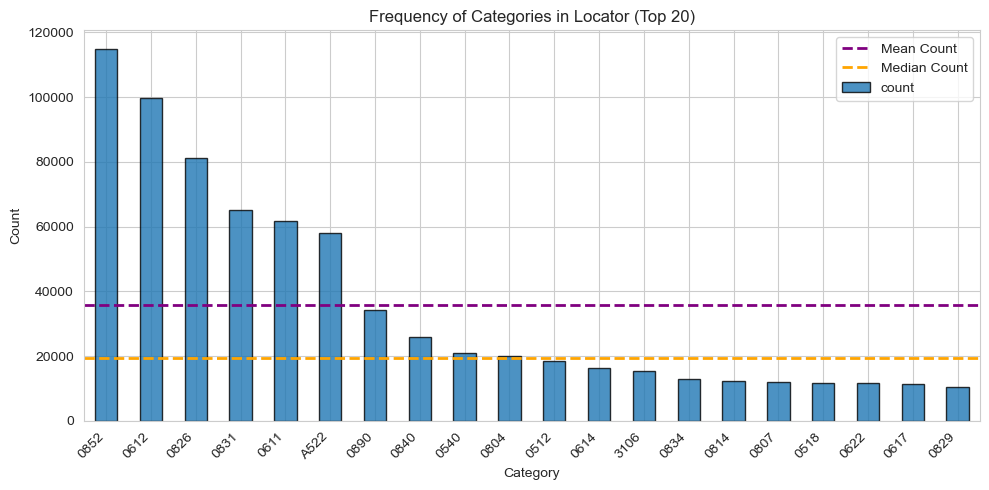

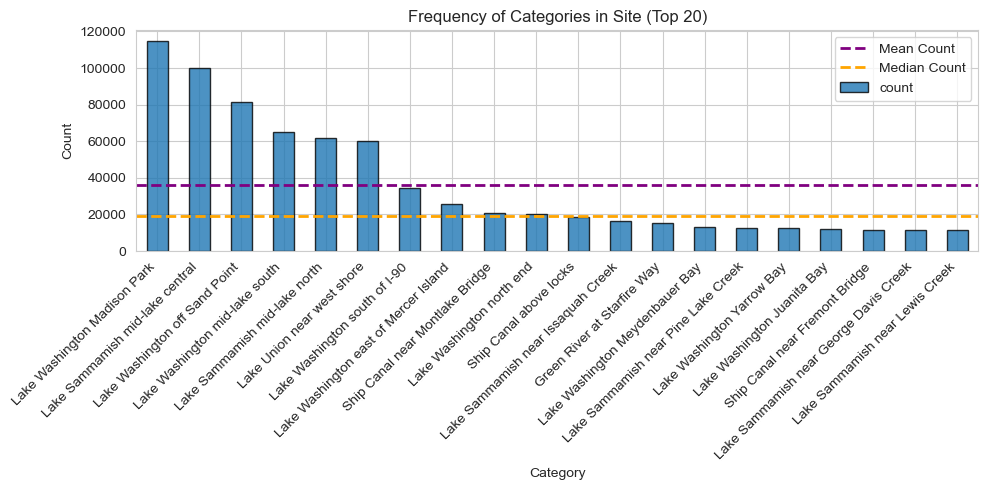

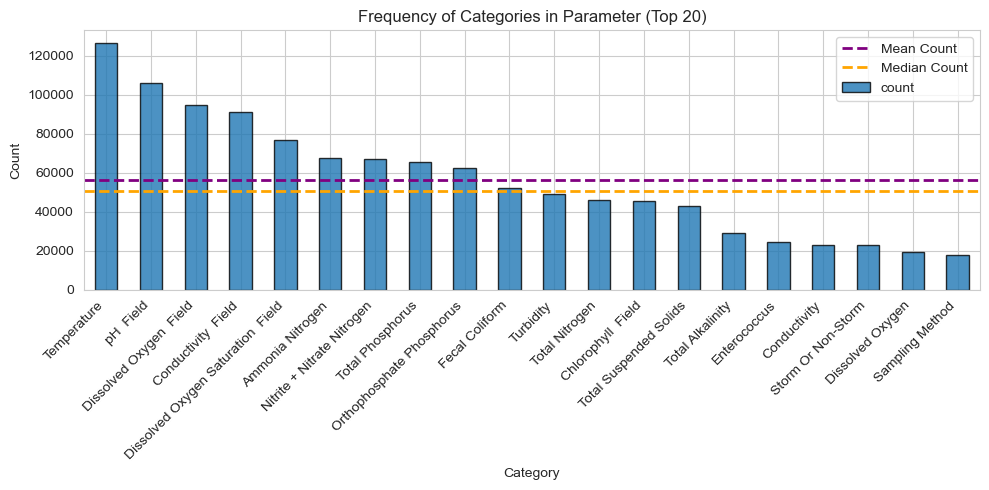

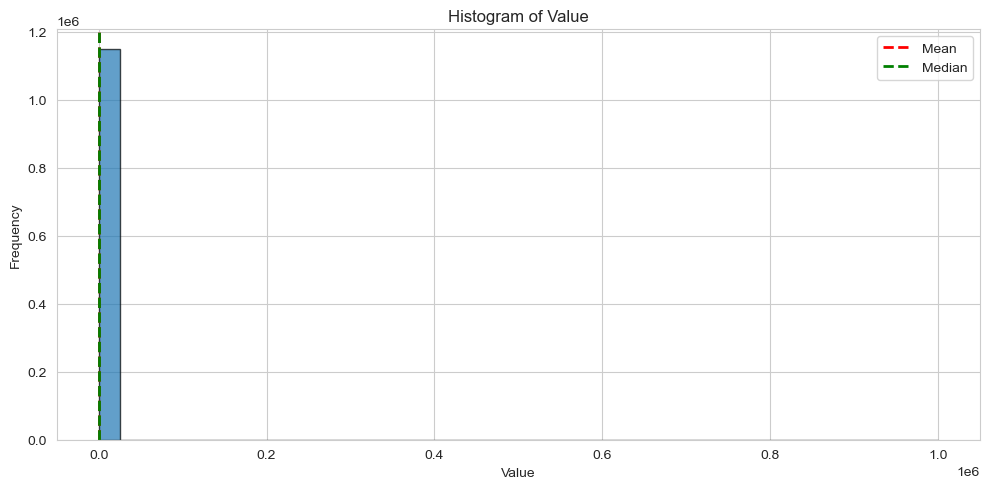

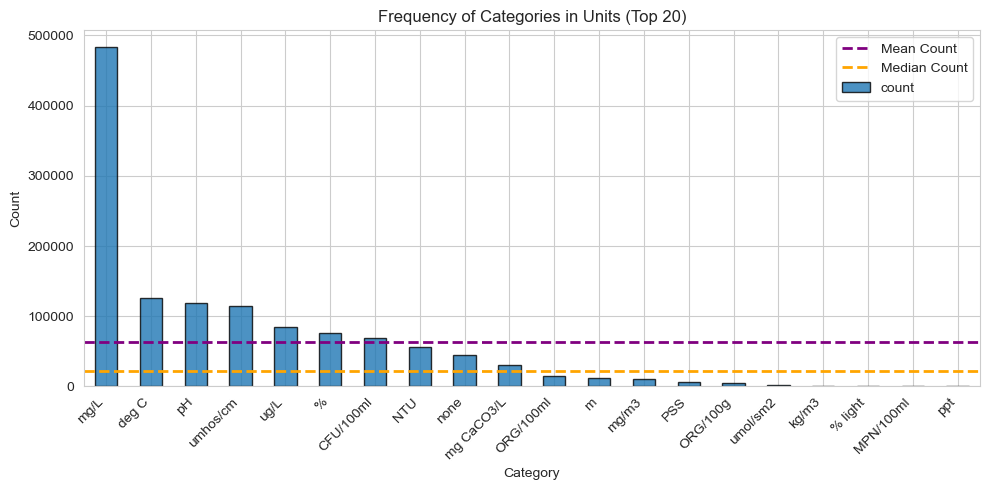

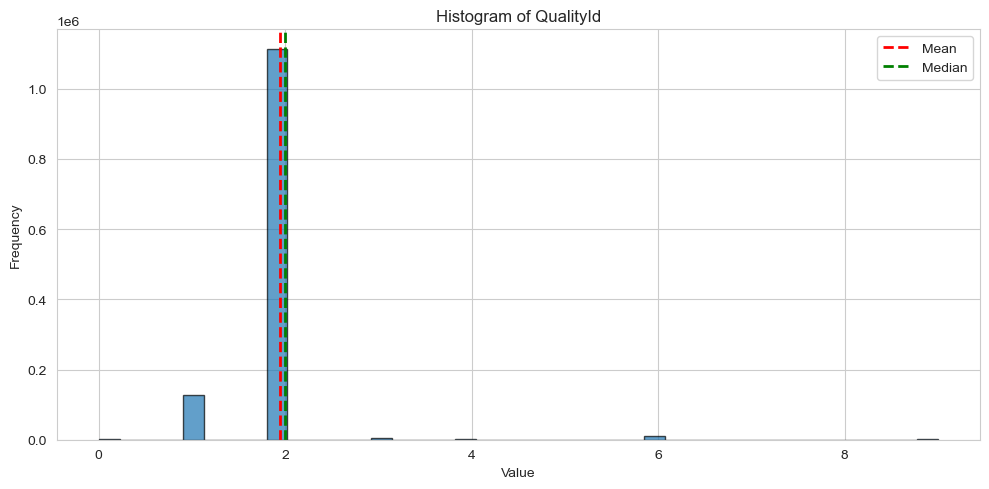

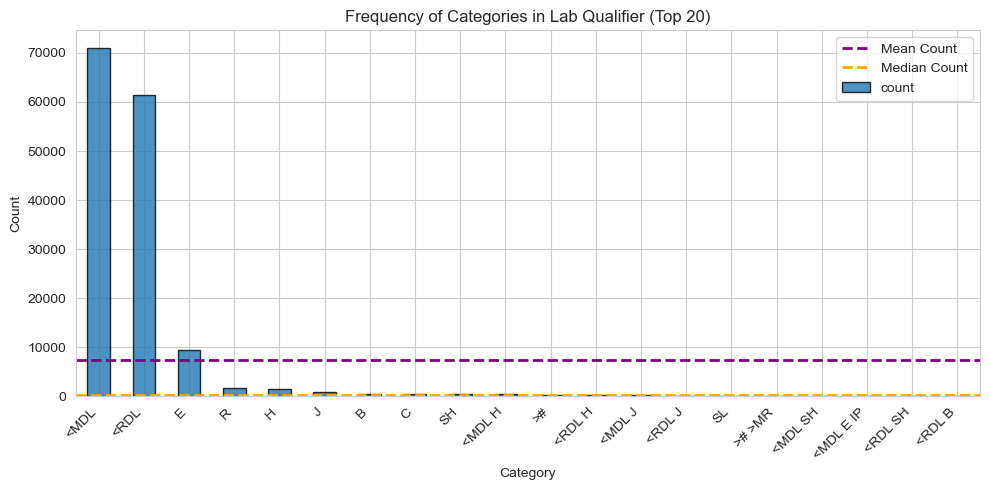

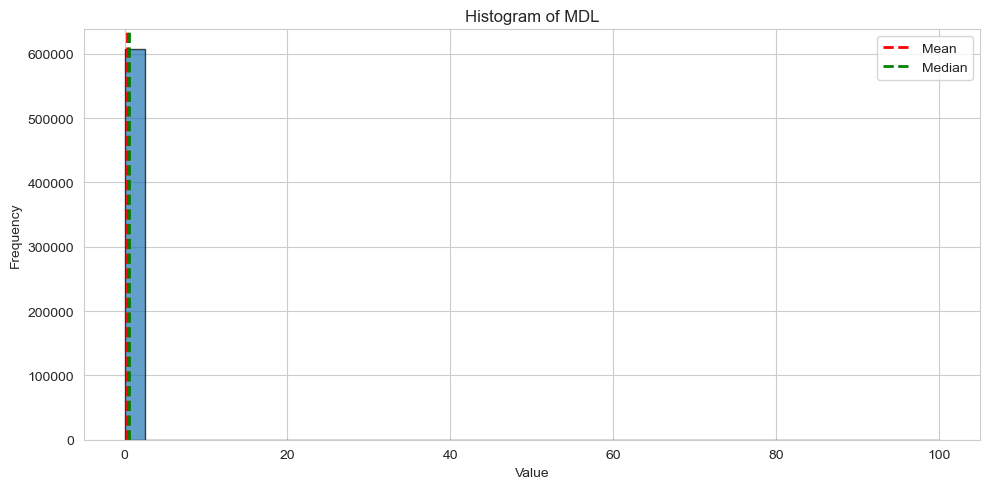

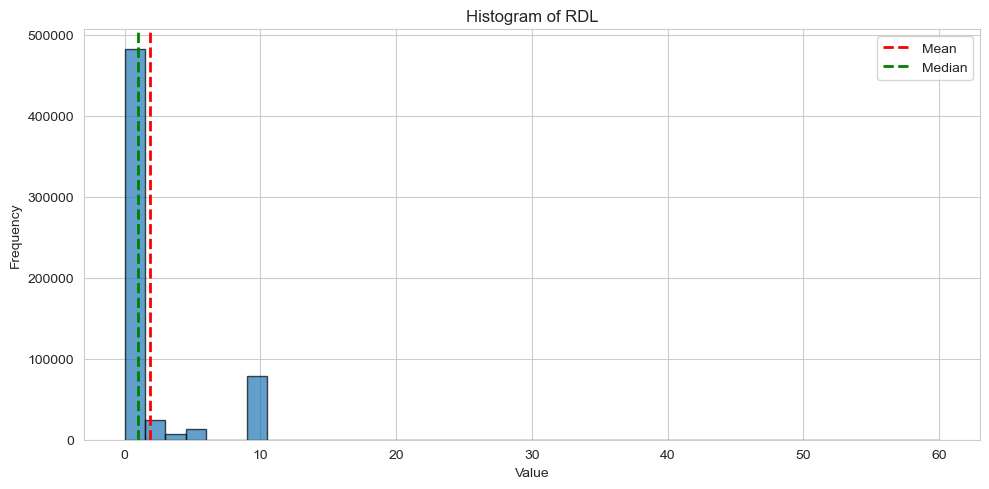

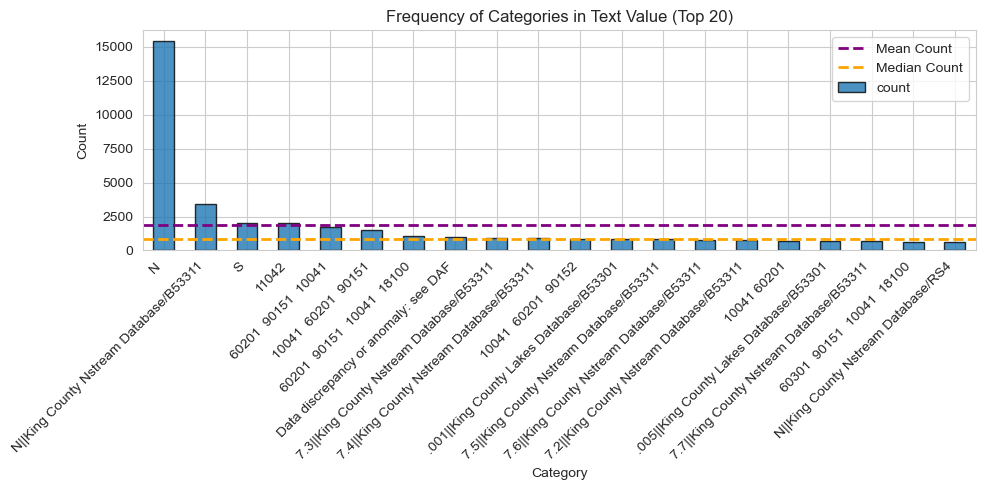

C:\Users\aleen\AppData\Local\Temp\ipykernel_19240\3104653052.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


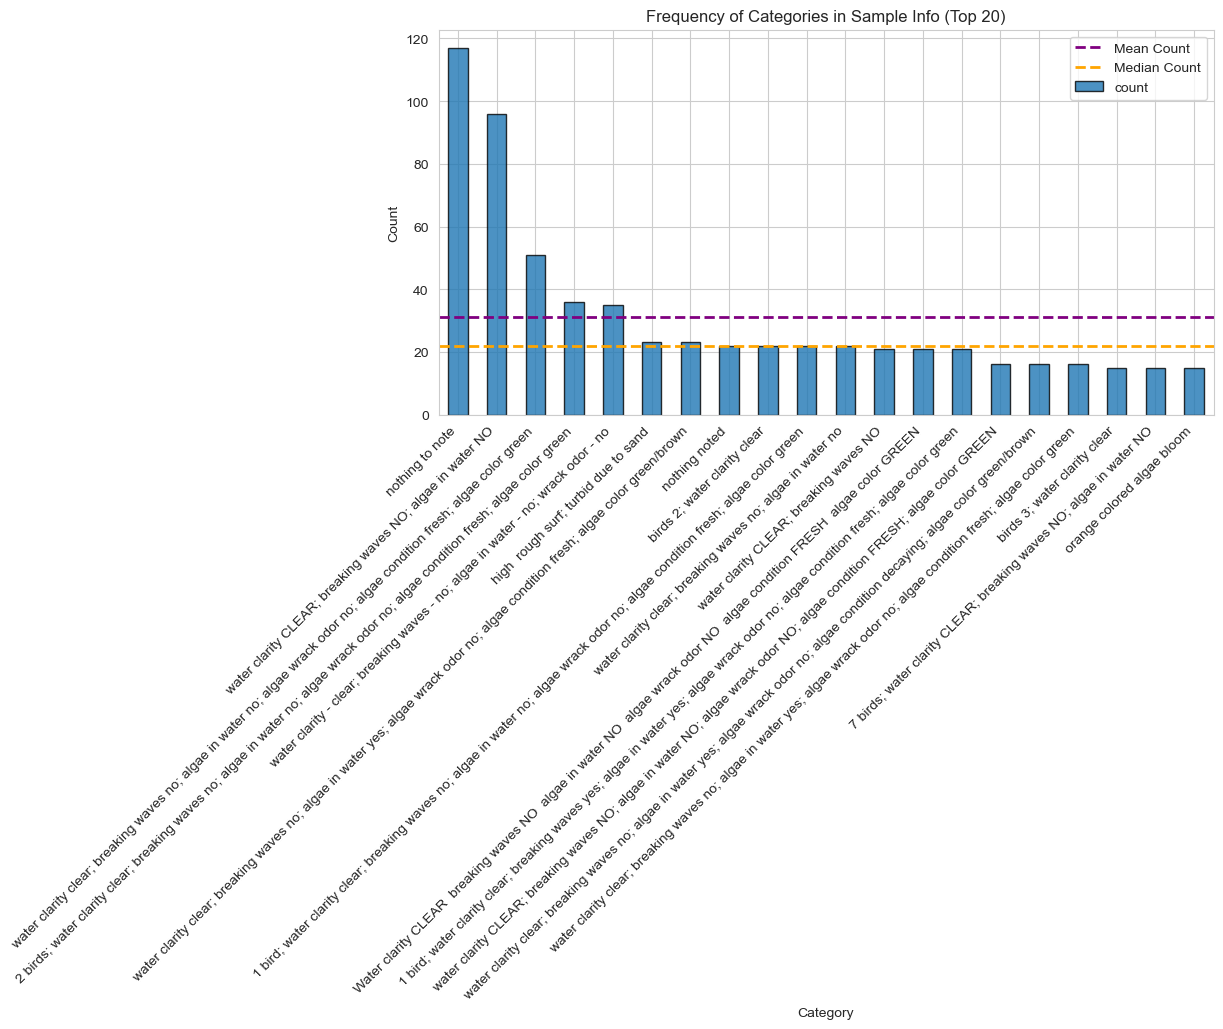

C:\Users\aleen\AppData\Local\Temp\ipykernel_19240\3104653052.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


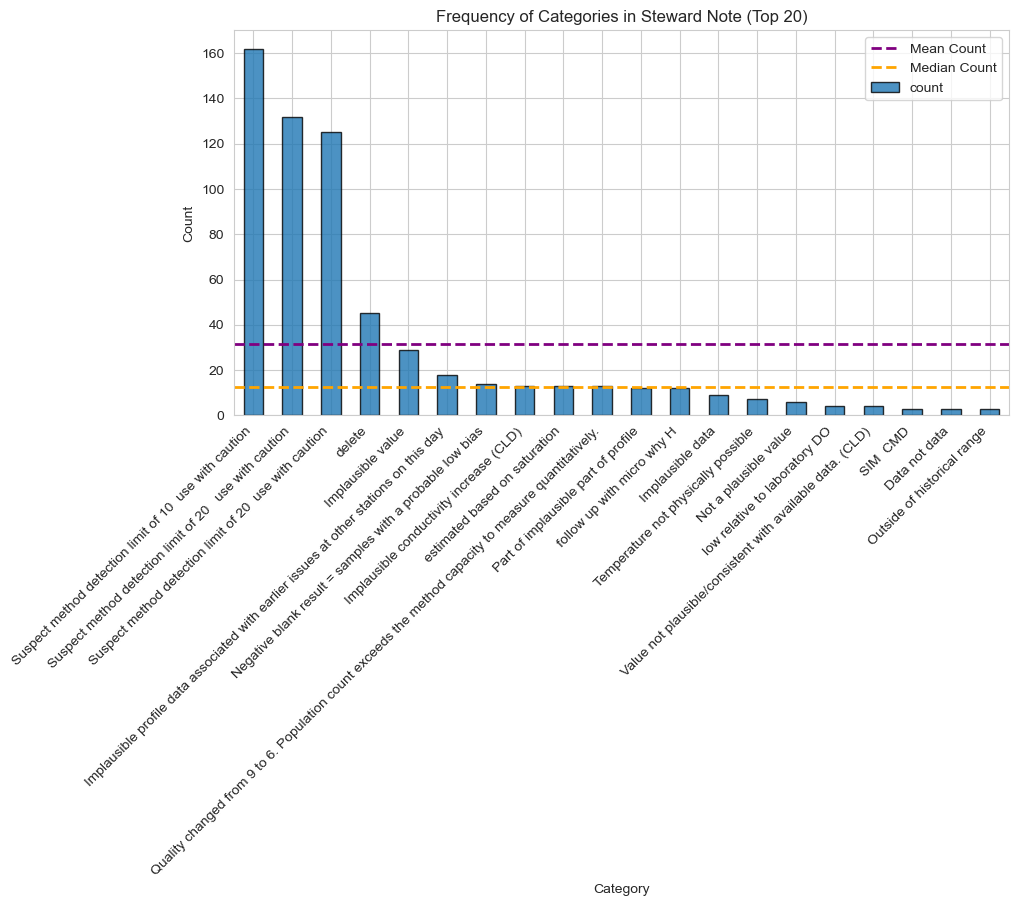

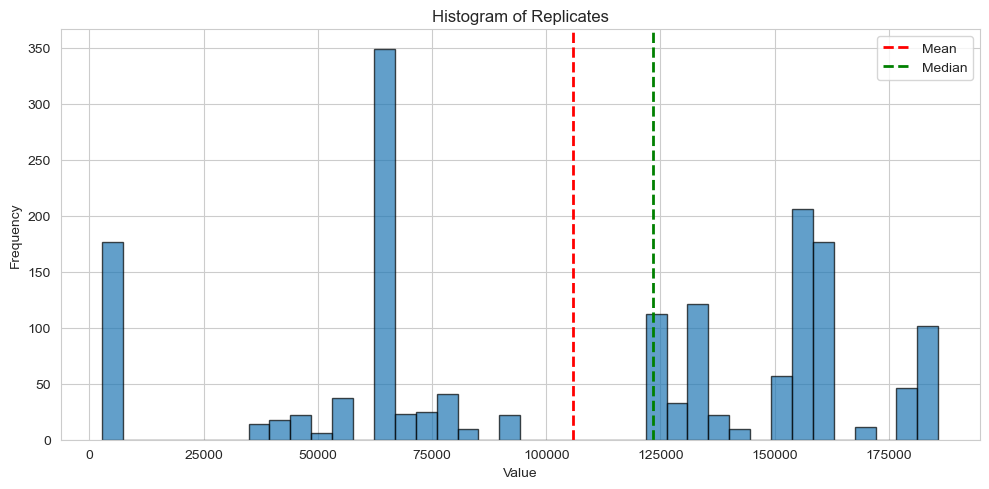

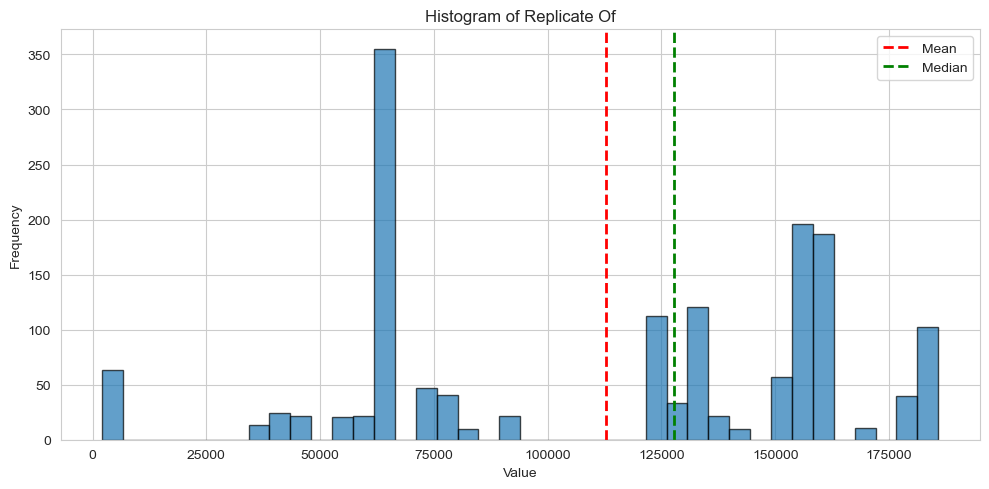

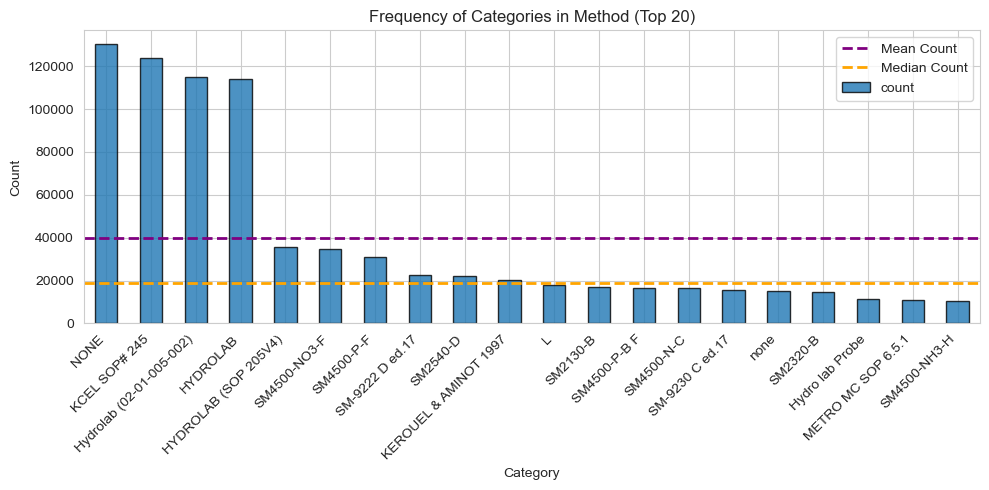

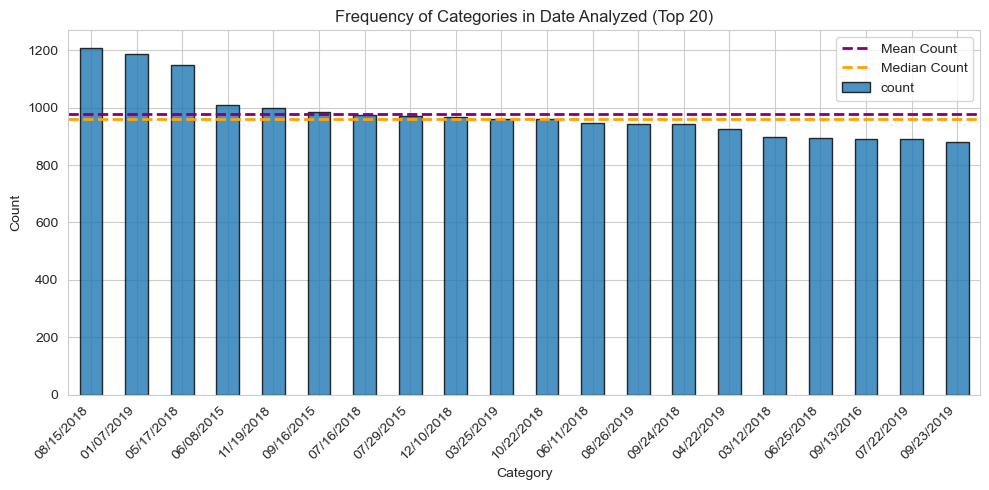

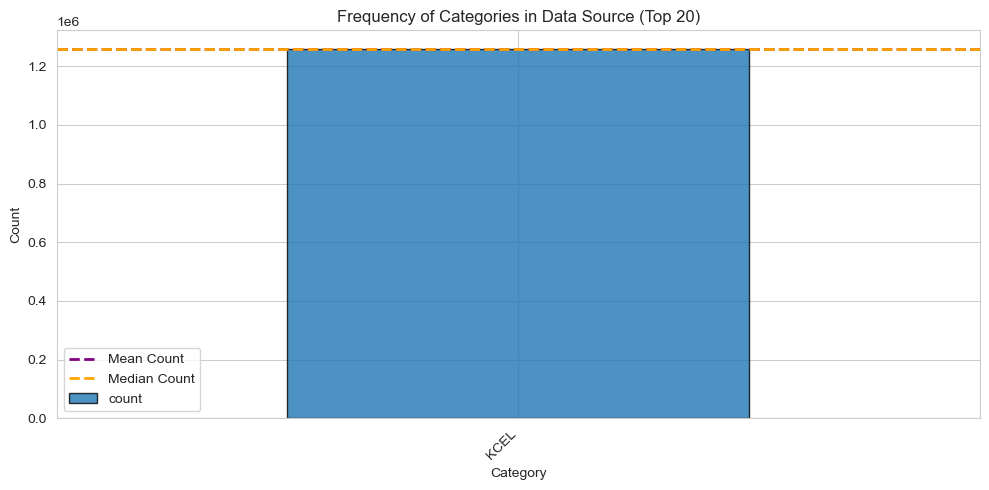

In [6]:
print("\n Histograms for all features \n")

for col in df.columns:
    plt.figure(figsize=(10, 5))
    col_data = df[col].dropna()
    # Numeric features
    if pd.api.types.is_numeric_dtype(df[col]):
        clean = col_data

        plt.hist(clean, bins=40, edgecolor="black", alpha=0.7)
        plt.title(f"Histogram of {col}")
        plt.xlabel("Value")
        plt.ylabel("Frequency")

        # Mean + Median Lines
        if not clean.empty:
            plt.axvline(clean.mean(), color="red", linestyle="--", linewidth=2, label="Mean")
            plt.axvline(clean.median(), color="green", linestyle="--", linewidth=2, label="Median")

        plt.legend()

    # Categorical features
    else:
        value_counts = col_data.value_counts().head(20)  # Top 20 categories
        value_counts.plot(kind="bar", edgecolor="black", alpha=0.8)

        plt.title(f"Frequency of Categories in {col} (Top 20)")
        plt.xlabel("Category")
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")

        # Mean + Median Lines for the category frequencies
        counts = value_counts.values
        if len(counts) > 0:
            plt.axhline(counts.mean(), color="purple", linestyle="--", linewidth=2, label="Mean Count")
            plt.axhline(np.median(counts), color="orange", linestyle="--", linewidth=2, label="Median Count")

        plt.legend()

    plt.tight_layout()
    plt.show()


 Missing data visualization 



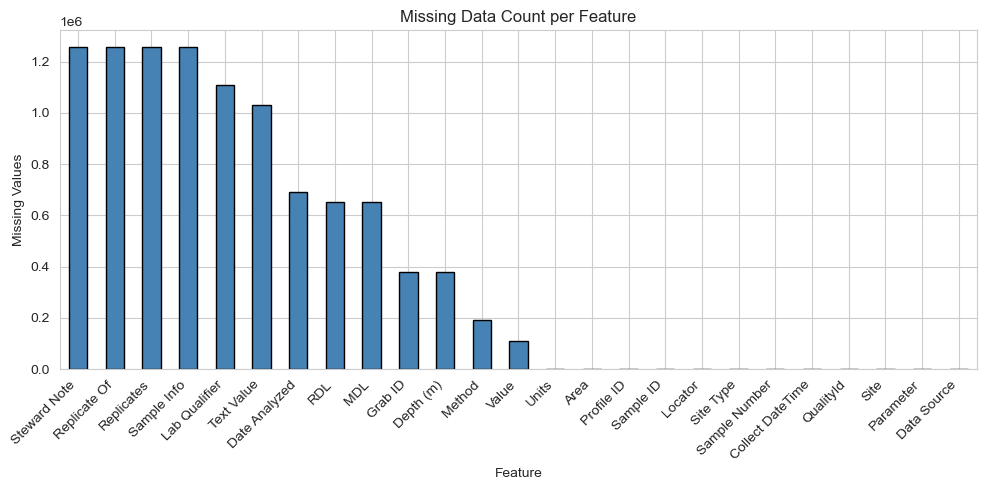

In [7]:
print("\n Missing data visualization \n")
# Missing data bar chart
missing_counts = df.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
missing_counts.plot(kind="bar", color="steelblue", edgecolor="black")

plt.title("Missing Data Count per Feature")
plt.ylabel("Missing Values")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv('data\water-quality-46085.csv') # REPLACE with your actual filename

# 1. Pivot Data (Long -> Wide)
# We must convert the dataset so each row is one water sample with columns for each chemical.
df_pivot = df.pivot_table(index=['Sample ID', 'Collect DateTime', 'Site Type'], 
                          columns='Parameter', 
                          values='Value').reset_index()

# 2. Create Target Variable (Hazard)
# Justification: We define "Hazardous" as Fecal Coliform > 200 (EPA Standard).
target_col = 'Fecal Coliform'
df_pivot['Hazard'] = (df_pivot[target_col] > 200).astype(int)

# Drop rows where the target itself was NaN before imputation (we can't train on them)
df_cleaned = df_pivot.dropna(subset=[target_col]).copy()

print(f"Dataset Shape after Pivot: {df_cleaned.shape}")
print(f"Class Balance (0=Safe, 1=Hazard):\n{df_cleaned['Hazard'].value_counts(normalize=True)}")

Dataset Shape after Pivot: (51279, 50)
Class Balance (0=Safe, 1=Hazard):
Hazard
0    0.775873
1    0.224127
Name: proportion, dtype: float64


### EDA Conclusions & Feasibility Analysis

**1. Dimensionality Reduction (Long vs. Wide):**
* Original Data: ~1.26 Million rows (Long format).
* Transformed Data: **51,279 unique water samples** (Wide format).
* **Justification:** Pivoting reduced the row count but created a meaningful structure where each row is a complete chemical profile, which is necessary for the classification model.

**2. Class Balance Verification:**
* **Safe Samples (Class 0):** 77.6%
* **Hazardous Samples (Class 1):** 22.4%
* **Justification:** The instructor raised concerns about whether the task fits the dataset. Our analysis confirms a **22.4% positivity rate**, which is a healthy distribution for binary classification. We do **not** have an extreme "needle in a haystack" imbalance, confirming that Machine Learning is a viable approach for this problem.

**3. Sparsity & Imputation:**
* Since the data was pivoted, we observed missing values in specific columns. We will apply **Median Imputation** in the next step to preserve the data distribution without dropping valuable samples.


## 2. Feature Engineering & Justification
**Requirement:** Feature Normalization, Selection, and Stratification.

* **Cyclical Features:** The instructor pointed out that time is cyclical (Hour 23 is close to Hour 0). We cannot treat Hour/Month as linear numbers. We will use Sine/Cosine transformations.
* **Normalization:** We use `StandardScaler` because Logistic Regression is sensitive to the scale of input features (e.g., Temperature vs. Nitrogen levels).

In [14]:
# Convert DateTime to datetime objects
df_cleaned['Collect DateTime'] = pd.to_datetime(df_cleaned['Collect DateTime'])

# Extract Hour and Month
df_cleaned['hour'] = df_cleaned['Collect DateTime'].dt.hour
df_cleaned['month'] = df_cleaned['Collect DateTime'].dt.month

# --- CYCLICAL TRANSFORMATION (As requested in feedback) ---
# Justification: Preserves the relationship that Dec (12) is close to Jan (1).
df_cleaned['hour_sin'] = np.sin(2 * np.pi * df_cleaned['hour'] / 24)
df_cleaned['hour_cos'] = np.cos(2 * np.pi * df_cleaned['hour'] / 24)
df_cleaned['month_sin'] = np.sin(2 * np.pi * df_cleaned['month'] / 12)
df_cleaned['month_cos'] = np.cos(2 * np.pi * df_cleaned['month'] / 12)

# Drop original linear time columns and non-numeric columns for modeling
drop_cols = ['Sample ID', 'Collect DateTime', 'Site Type', 'hour', 'month', 'Hazard', target_col]
feature_cols = [c for c in df_cleaned.columns if c not in drop_cols]

X = df_cleaned[feature_cols]
y = df_cleaned['Hazard']

# Handle Missing Values (Imputation)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

C:\Users\aleen\AppData\Local\Temp\ipykernel_19240\3639856282.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['Collect DateTime'] = pd.to_datetime(df_cleaned['Collect DateTime'])
C:\Users\aleen\anaconda3\Lib\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: ['BGA PC  Field']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


## 3. ML Baseline & Hyperparameter Tuning
**Goal:** Establish a benchmark using Logistic Regression.
**Tuning:** We used `GridSearchCV` to the optimal regularization strength (`C`).
    

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Normalization (Required for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline Model with Hyperparameter Tuning
params = {'C': [0.01, 0.1, 1, 10]}
grid_log = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=3, scoring='f1')
grid_log.fit(X_train_scaled, y_train)

best_log_model = grid_log.best_estimator_
y_pred_log = best_log_model.predict(X_test_scaled)

print(f"Best Parameters: {grid_log.best_params_}")
print("Baseline (Logistic Regression) Classification Report:")
print(classification_report(y_test, y_pred_log))

Best Parameters: {'C': 10}
Baseline (Logistic Regression) Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      7907
           1       0.81      0.41      0.55      2349

    accuracy                           0.84     10256
   macro avg       0.83      0.69      0.73     10256
weighted avg       0.84      0.84      0.82     10256



### Baseline Results
* **Model:** Logistic Regression with `C=10` (Best Hyperparameter).
* **Accuracy:** 84%
* **F1-Score (Hazard Class):** 0.55
* **Observation:** While the accuracy was high, the model suffered from **low recall (0.41)** for the "Hazard" class. This indicates that the linear model struggled to separate the minority class (hazardous samples) from the majority class, frequently misclassifying actual pollution events as "Safe."

## 4. Improvement Model
**Model Selected:** Gradient Boosting (XGBoost/GradientBoostingClassifier).
**Justification:** Unlike Logistic Regression, Gradient Boosting can capture non-linear relationships between chemicals (e.g., how pH affects toxicity at different temperatures) and is robust to outliers.

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Improvement Model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train) # Tree models don't strictly need scaling, but using X_train is fine

y_pred_gb = gb_model.predict(X_test)

print("Improvement (Gradient Boosting) Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Metric Comparison
f1_base = f1_score(y_test, y_pred_log)
f1_gb = f1_score(y_test, y_pred_gb)

print(f"Baseline F1: {f1_base:.4f}")
print(f"Gradient Boosting F1: {f1_gb:.4f}")

Improvement (Gradient Boosting) Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      7907
           1       0.82      0.56      0.66      2349

    accuracy                           0.87     10256
   macro avg       0.85      0.76      0.79     10256
weighted avg       0.87      0.87      0.86     10256

Baseline F1: 0.5476
Gradient Boosting F1: 0.6641


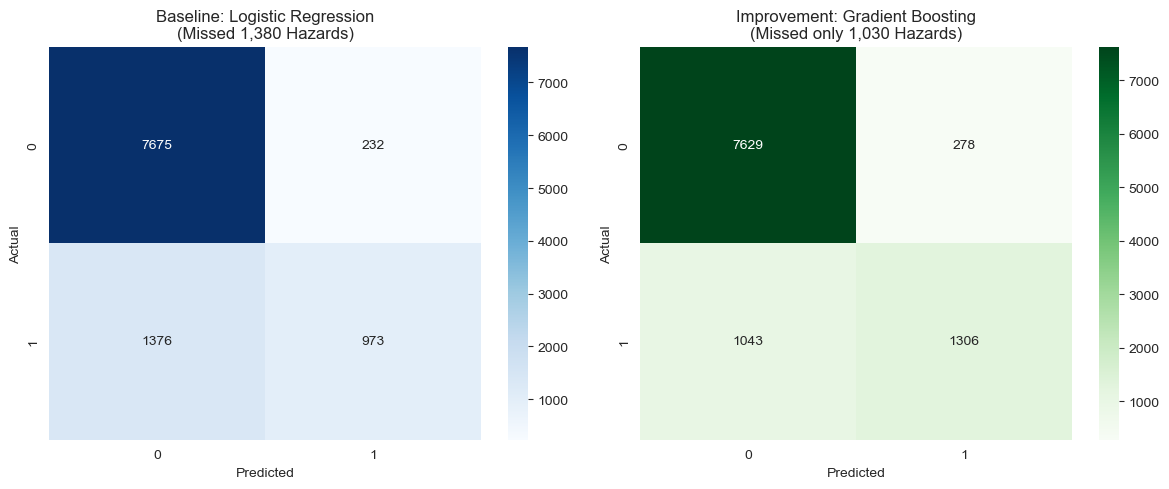

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate Confusion Matrices
cm_base = confusion_matrix(y_test, y_pred_log)
cm_gb = confusion_matrix(y_test, y_pred_gb)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline Plot
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Baseline: Logistic Regression\n(Missed 1,380 Hazards)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Gradient Boosting Plot
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Improvement: Gradient Boosting\n(Missed only 1,030 Hazards)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

### Improvement Model Results
* **Model:** Gradient Boosting Classifier.
* **Performance:**
    * **Accuracy:** 87% (+3% improvement)
    * **F1-Score:** 0.66 (+11% improvement)
    * **Recall:** 0.56 (+15% improvement)
* **Discussion:** The Gradient Boosting model significantly outperformed the baseline. The key improvement was in **Recall**, meaning the non-linear tree model successfully identified 15% more hazardous water samples than the baseline. This confirms that the relationship between chemical parameters (like pH and Temperature) and toxicity is likely non-linear.
* [cite_start]**Gap Analysis:** We aimed for an F1-score of 0.75[cite: 24]. We are currently at 0.66. To close this gap, we will perform feature selection to remove noisy parameters in the final week.